# Libraries

In [2]:
import pandas as pd
import glob
import requests
import time

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pytz

# Data Loading

In [29]:
# load the streaming history data, where 'ts' column is datetime
stream_df = pd.read_csv('datasets/tracks_df_cleaned.csv', parse_dates=['ts'])

C:\Users\Kim\AppData\Local\Temp\ipykernel_19036\4256158604.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  stream_df = pd.read_csv('datasets/tracks_df_cleaned.csv', parse_dates=['ts'])


In [30]:
stream_df.dtypes

ts                 datetime64[ns, UTC]
platform                        object
ms_played                        int64
conn_country                    object
track_name                      object
artist_name                     object
album_name                      object
track_id                        object
reason_start                    object
reason_end                      object
shuffle                           bool
skipped                         object
offline                           bool
incognito_mode                    bool
ts_local                        object
hour                             int64
day_of_week_str                 object
day_of_week_int                  int64
local_date                       int64
local_month                      int64
local_year                       int64
dtype: object

In [31]:
#check the number of rows and columns we have in streaming_df
print(stream_df.shape)
print(stream_df.columns)

(129393, 21)
Index(['ts', 'platform', 'ms_played', 'conn_country', 'track_name',
       'artist_name', 'album_name', 'track_id', 'reason_start', 'reason_end',
       'shuffle', 'skipped', 'offline', 'incognito_mode', 'ts_local', 'hour',
       'day_of_week_str', 'day_of_week_int', 'local_date', 'local_month',
       'local_year'],
      dtype='object')


In [32]:
# load the track info data
track_info_df = pd.read_csv('datasets/tracks_info_df.csv')

In [33]:
print(track_info_df.shape)
print(track_info_df.columns)

(5245, 6)
Index(['track_id', 'name', 'artistName', 'release_date', 'popularity',
       'duration_ms'],
      dtype='object')


In [34]:
# load the track features data
track_features_df = pd.read_csv('datasets/tracks_features_df.csv')

In [35]:
print(track_features_df.shape)
print(track_features_df.columns)

(5238, 13)
Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')


# Analysing trends of the data

## Total Minutes Streamed per Year
how much do I consume spotify per year? what's the trend?

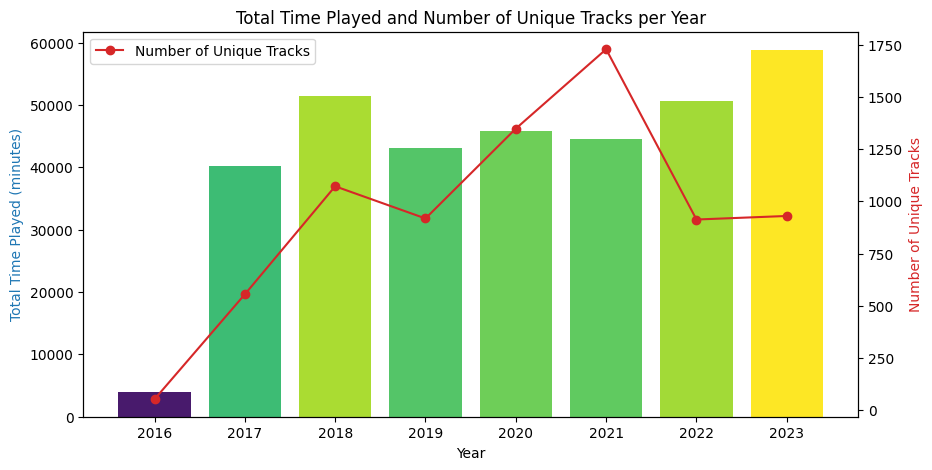

In [36]:
# Group by year and sum the ms_played in minutes
grouped_data = stream_df.groupby(['local_year'])['ms_played'].sum().div(60000)
grouped_counts = stream_df.groupby(['local_year'])['track_id'].nunique()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the sum of ms_played in minutes grouped by year with colored bars
bars = ax1.bar(grouped_data.index, grouped_data, color=plt.cm.viridis(grouped_data.values / grouped_data.max()), width=0.8)

# Set plot labels and title for the first y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Time Played (minutes)', color='tab:blue')
ax1.set_title('Total Time Played and Number of Unique Tracks per Year')

# Create a second y-axis for the counts
ax2 = ax1.twinx()
ax2.plot(grouped_counts.index, grouped_counts, color='tab:red', marker='o', label='Number of Unique Tracks')

# Set plot labels for the second y-axis
ax2.set_ylabel('Number of Unique Tracks', color='tab:red')

# Display the legend
ax2.legend(loc='upper left')

# Show the plot
plt.show()


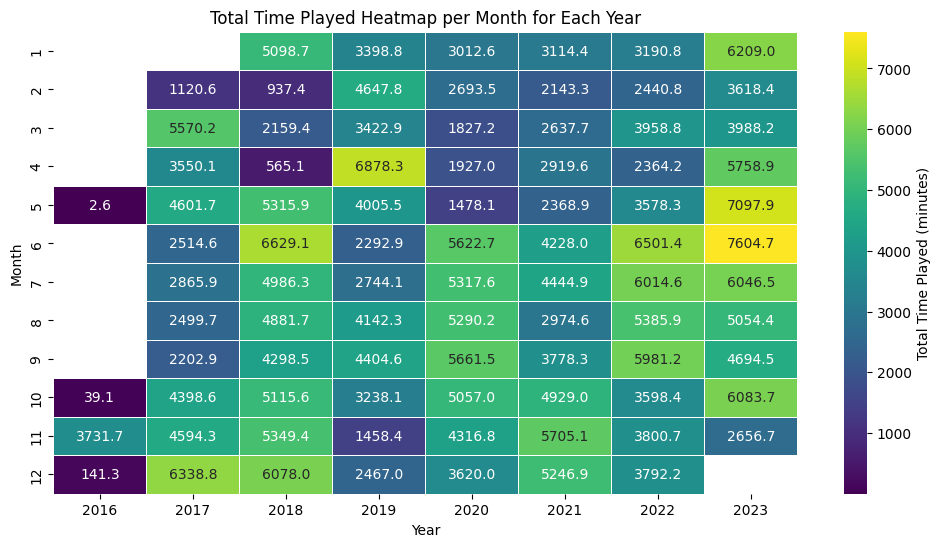

In [37]:
# Group by year and month and sum the ms_played in minutes
grouped_data_monthly = stream_df.groupby(['local_year', 'local_month'])['ms_played'].sum().div(60000)

# Reshape the data for plotting
pivot_data = grouped_data_monthly.unstack(level=0)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="viridis", annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Total Time Played (minutes)'})

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Total Time Played Heatmap per Month for Each Year')

# Show the plot
plt.show()


as we can see from the visualizations, [2018, 2023] are the top 2 year where I listened music on spotify the most and [2016, 2017] are the least. Note that the length of data for 2016 and 2023 are not a complete one-year long, since I started my spotify subscribtion on May 2016 and collected the streaming history data on October 2023

In [38]:
stream_df.head(5)

ts platform  ms_played conn_country  \
0 2016-05-14 00:06:31+00:00  android      32462           ID   
1 2016-05-14 00:06:37+00:00  android       5614           ID   
2 2016-05-14 00:07:07+00:00  android      29970           ID   
3 2016-05-14 00:07:11+00:00  android       3677           ID   
4 2016-05-14 00:07:16+00:00  android       4685           ID   

                   track_name artist_name                  album_name  \
0            Solace Album Mix  Monstercat     Monstercat 007 - Solace   
1    Best of 2015 (Album Mix)  Monstercat    Monstercat: Best of 2015   
2           Horizon Album Mix  Monstercat   Monstercat 018 - Frontier   
3     Monstercat Best of 2012  Monstercat   Monstercat - Best of 2012   
4  Monstercat Podcast EP. 100  Monstercat  Monstercat Podcast EP. 100   

                 track_id reason_start reason_end  ...  skipped offline  \
0  6tAM5c0bJOwRqGAEgiNMpI     clickrow     fwdbtn  ...      NaN   False   
1  4mjgNE8R31AzxWfPNGtVMf       fwdbtn     fwdbtn  ...      NaN   False   
2  5Q0P0cX3e42PgKd8LLS3ms       fwdbtn     fwdbtn  ...      NaN   False   
3  6jvMmRtSzoEibQGrQkSISQ       fwdbtn     fwdbtn  ...      NaN   False   
4  1KzLyjpjIRHuuj4iX8QsC2       fwdbtn     fwdbtn  ...      NaN   False   

   incognito_mode                   ts_local hour  day_of_week_str  \
0           False  2016-05-14 07:06:31+07:00    7         Saturday   
1           False  2016-05-14 07:06:37+07:00    7         Saturday   
2           False  2016-05-14 07:07:07+07:00    7         Saturday   
3           False  2016-05-14 07:07:11+07:00    7         Saturday   
4           False  2016-05-14 07:07:16+07:00    7         Saturday   

  day_of_week_int  local_date  local_month  local_year  
0               5          14            5        2016  
1               5          14            5        2016  
2               5          14            5        2016  
3               5          14            5        2016  
4               5          14            5        2016  

[5 rows x 21 columns]

In [46]:
daily_usage = stream_df.groupby(['local_year', 'local_month', 'local_date'])['ms_played'].sum().div(60000).reset_index()
daily_usage.rename(columns={'local_year': 'year', 'local_month': 'month', 'local_date': 'day', 'ms_played': 'minutes_played'}, inplace=True)
daily_usage['date'] = pd.to_datetime(daily_usage[['year', 'month', 'day']])
daily_usage['day_of_week'] = daily_usage['date'].dt.dayofweek
daily_usage.drop(['month', 'day'], axis=1, inplace=True)

how is my spotify daily consumption? is there any day of week that I particularly consume spotify the most (or the least)?

Text(0.5, 1.0, 'Daily Usage Violin Plot')

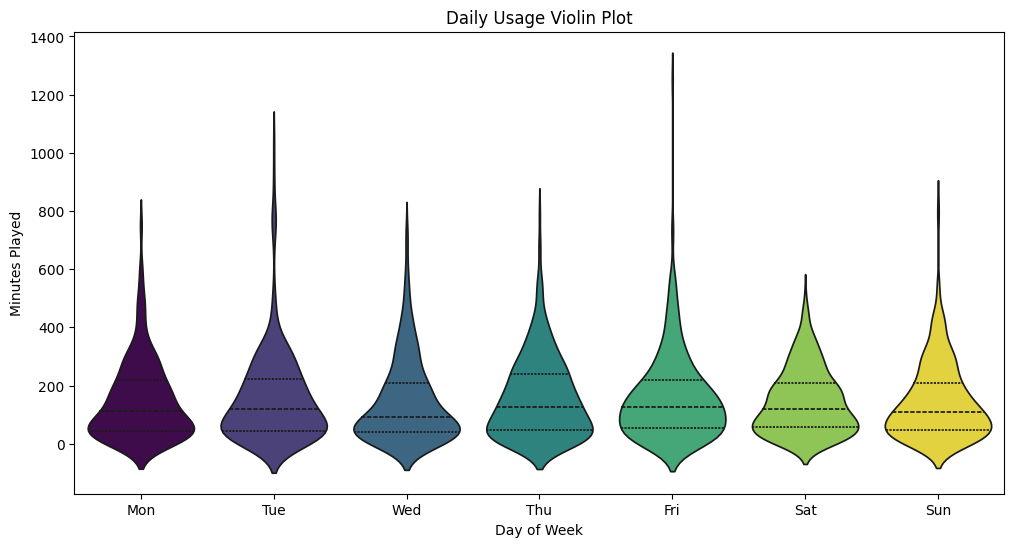

In [47]:
# visualize the daily usage using a line plot with the day of week on the x-axis for each year
plt.figure(figsize=(12, 6))
sns.violinplot(x='day_of_week', y='minutes_played', data=daily_usage, hue = 'day_of_week', legend = False, palette='viridis', inner = 'quartile')
plt.xlabel('Day of Week')
plt.ylabel('Minutes Played')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Daily Usage Violin Plot')


In [48]:
# calculate significant correlations and p-values between the minutes_played and day_of_week columns
corr, p_value = pearsonr(daily_usage['minutes_played'], daily_usage['day_of_week'])
print('Correlation: ', corr)
print('P-value: ', p_value)

Correlation:  -0.010764488902987757
P-value:  0.612051912257824


on average, my spotify daily usage almost has no difference on each day of week but there are more outliers on Tuesday and Friday than other days of week
The correlation is close to zero (and the p-value is relatively high), indicating a weak and likely non-significant linear relationship between minutes_played and day_of_week

In [50]:
stream_df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'track_name',
       'artist_name', 'album_name', 'track_id', 'reason_start', 'reason_end',
       'shuffle', 'skipped', 'offline', 'incognito_mode', 'ts_local', 'hour',
       'day_of_week_str', 'day_of_week_int', 'local_date', 'local_month',
       'local_year'],
      dtype='object')

In [51]:
hourly_usage = stream_df.groupby(['local_year', 'local_month', 'local_date', 'hour'])['ms_played'].sum().div(60000).reset_index()
hourly_usage.rename(columns={'ms_played': 'minutes_played'}, inplace=True)
hourly_usage.drop(['local_month', 'local_date'], axis=1, inplace=True)

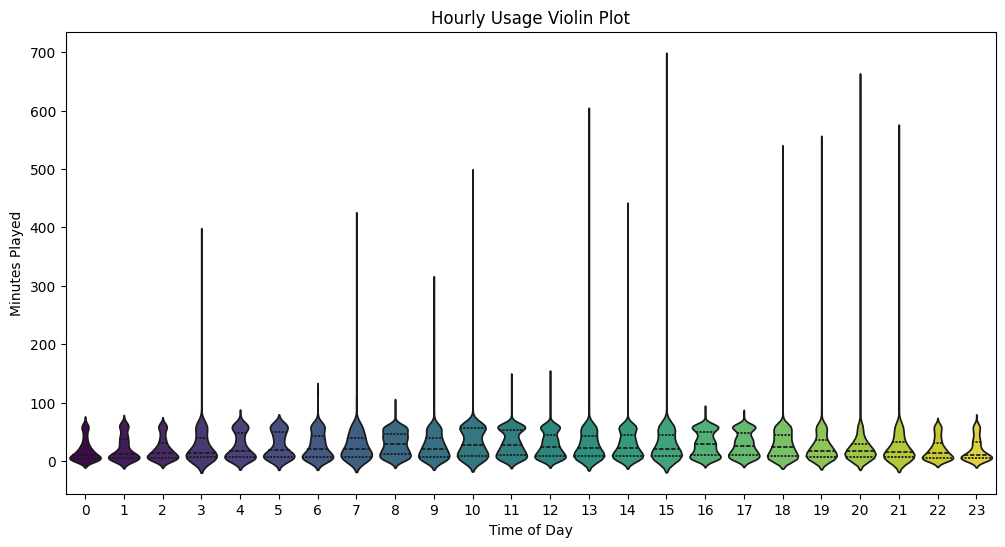

In [53]:
# visualize the daily usage using a line plot with the day of week on the x-axis for each year
plt.figure(figsize=(12, 6))
sns.violinplot(x='hour', y='minutes_played', data=hourly_usage, hue = 'hour', legend = False, palette='viridis', inner = 'quartile')
plt.xlabel('Time of Day')
plt.ylabel('Minutes Played')
plt.title('Hourly Usage Violin Plot');


## Favorite / Top Artists and Tracks
- who are my favorite artist of all-time?
- is it the same artist every year or does it change?

### who are my top 3 artists of all time?

In [85]:
# find the top 5 most listened artists per year
top_artists = stream_df.groupby(['local_year', 'artist_name'])['ms_played'].sum().div(60000).reset_index()
top_artists.rename(columns={'local_year':'year', 'ms_played': 'minutes_played'}, inplace=True)

In [86]:
top_artists.columns

Index(['year', 'artist_name', 'minutes_played'], dtype='object')

In [155]:
top_artists.groupby('artist_name')['minutes_played'].sum().reset_index().sort_values('minutes_played', ascending=False).head(5)

artist_name  minutes_played
147          Bishop Briggs    23012.266617
1425            Us The Duo    20044.487850
569   In Love With a Ghost    19871.318683
999          Orla Gartland    19538.292650
1543                 dodie    15084.512367

### who are my top 3 artists on each year?

In [91]:
top3_artists_year = top_artists.sort_values(['year', 'minutes_played'], ascending=[True, False])\
    .groupby('year').head(3)\
    .reset_index(drop=True)
top3_artists_year

year           artist_name  minutes_played
0   2016                 Ylvis     1011.990267
1   2016          Virtual Riot      835.094683
2   2016                   Au5      358.598283
3   2017  In Love With a Ghost    10910.546983
4   2017     Foster The People     1929.053783
5   2017              Pink Guy     1925.746667
6   2018         Bishop Briggs     7945.516100
7   2018  In Love With a Ghost     3422.955167
8   2018             Televisor     2844.350083
9   2019               Danilla     6274.415417
10  2019         Bishop Briggs     4358.445700
11  2019              kobasolo     1664.839317
12  2020            Us The Duo    11927.042800
13  2020       Daniela Andrade     6549.731567
14  2020         Bishop Briggs     5502.823617
15  2021       Daniela Andrade     6131.098883
16  2021           Darren Korb     6099.712500
17  2021            Us The Duo     4956.650950
18  2022         Orla Gartland    12528.818467
19  2022                 dodie     7501.159667
20  2022         Chilli Beans.     6201.337567
21  2023           Pomplamoose    10775.142433
22  2023                 dodie     7583.352700
23  2023         Orla Gartland     7009.474183

### how about my favorite tracks of all times?

In [93]:
# find the top 5 most listened tracks per year
top_tracks = stream_df.groupby(['local_year', 'track_id']).agg(
    {'track_name': 'first', 'artist_name': 'first', 'ms_played': 'sum'}
).reset_index()
top_tracks['ms_played'] = top_tracks['ms_played'].div(60000)
top_tracks.rename(columns={'local_year':'year', 'ms_played':'minutes_played'}, inplace=True)

In [157]:
top_tracks.groupby('track_id').agg(
    {'track_name': 'first', 'artist_name': 'first', 'minutes_played': 'sum'}
).reset_index() \
    [['artist_name', 'track_name', 'minutes_played']].sort_values('minutes_played', ascending=False).head(5)

artist_name                     track_name  minutes_played
5193  Foster The People                Pumped Up Kicks     2008.594417
3881        Darren Korb                The Unseen Ones     1978.943967
2600      Bishop Briggs                          River     1953.130700
3829        Darren Korb  Good Riddance (Eurydice Solo)     1799.707050
5010            Danilla                    Ada Di Sana     1798.409883

In [98]:
# sort the values by year and minutes
top5_tracks = top_tracks[['year', 'artist_name', 'track_name', 'minutes_played']].sort_values(['year', 'minutes_played'], ascending=[True, False])\
    .groupby('year').head(3)\
    .reset_index(drop=True)
top5_tracks

year           artist_name  \
0   2016          Virtual Riot   
1   2016                 Ylvis   
2   2016         Hyper Potions   
3   2017     Foster The People   
4   2017  In Love With a Ghost   
5   2017  In Love With a Ghost   
6   2018                 Aimer   
7   2018         Bishop Briggs   
8   2018         Bishop Briggs   
9   2019               Danilla   
10  2019                Riouth   
11  2019               Danilla   
12  2020           Darren Korb   
13  2020            Us The Duo   
14  2020           St. Vincent   
15  2021           Darren Korb   
16  2021                 Birdy   
17  2021             Shagabond   
18  2022                 milet   
19  2022                 dodie   
20  2022         Chilli Beans.   
21  2023           Pomplamoose   
22  2023           Pomplamoose   
23  2023           Pomplamoose   

                                           track_name  minutes_played  
0                                          Time Stops      834.998950  
1                                           The Cabin      479.813383  
2                   Unbreakable (feat. Danyka Nadeau)      355.384950  
3                                     Pumped Up Kicks     1929.053783  
4   Interdimensional Portal Leading to a Cute Plac...     1449.877183  
5                                             Crystal     1227.475417  
6                                               カタオモイ     1678.417450  
7                                               River     1459.753083  
8                                               Dream     1138.130650  
9                                         Ada Di Sana     1707.395067  
10                                           Sentient     1649.383633  
11                               Senja Di Ambang Pilu     1613.601217  
12                      Good Riddance (Eurydice Solo)     1537.915350  
13                                   Homesick Lullaby      929.576867  
14                                    Fast Slow Disco      756.889800  
15                                    The Unseen Ones     1802.951567  
16  Keeping Your Head Up - Don Diablo Remix; Radio...     1123.116467  
17                                             Helium      919.319950  
18                          おもかげ (produced by Vaundy)     1738.078933  
19                               Would You Be So Kind     1264.554233  
20                                            Tremolo     1153.947433  
21                                 Rainbow Connection     1085.350767  
22                   Harder, Better, Faster, Stronger      943.137783  
23                                       Mr. Blue Sky      911.703783

In [65]:
top_artists.columns

Index(['year', 'artist_name', 'minutes_played'], dtype='object')

### How many times x artist/tracks came up on my annual top 10?

In [146]:
# Get the top 10 artists for each year
top10_artists_year = top_artists.sort_values(['year', 'minutes_played'], ascending=[True, False])\
    .groupby('year').head(10)\
    .reset_index(drop=True)

# Create a binary column 'in_top_10' indicating presence in the top 10 (set to 1)
top10_artists_year['in_top_10'] = 1

# Create the pivot table, where values indicate if an artist is in the top 10 for that year
top10_artists_pivot = top10_artists_year.pivot_table(
    index='artist_name',
    columns='year',
    values='in_top_10',
    aggfunc='first',
    fill_value=0
).reset_index()

# Add 'total_appearance' column, which counts how many times the artist appeared in the top 10
top10_artists_pivot['total_appearance'] = top10_artists_pivot.iloc[:, 1:].sum(axis=1)

In [147]:
# let's get the longest streak of an artist being in the top 10
def longest_streak(series):
    # Create a mask for the presence in the top 10
    presence = series.eq(1)
    
    # Create an array to track streaks
    streaks = (presence.ne(presence.shift(1))).cumsum()
    
    # Count the length of each streak
    return presence.groupby(streaks).sum().max()

In [176]:
def longest_streak_increment(series):
    max_streak, current_streak = 0, 0

    for value in series:
        if value == 1:
            current_streak += 1  
        else:
            max_streak = max(max_streak, current_streak) 
            current_streak = 0  

    max_streak = max(max_streak, current_streak)
    return max_streak 


In [148]:
top10_artists_pivot['longest_streak'] = top10_artists_pivot.iloc[:, 1:-1].apply(longest_streak, axis=1)

In [158]:
# get the artists' minutes played from the top_artists dataframe
total_minutes_played = top_artists.groupby('artist_name')['minutes_played'].sum().reset_index()
top10_artists_pivot = top10_artists_pivot.merge(total_minutes_played, on='artist_name', how='left')

In [159]:
top10_artists_pivot.sort_values('total_appearance', ascending=False).head(10)

artist_name  2016  2017  2018  2019  2020  2021  2022  2023  \
6          Bishop Briggs     0     0     1     1     1     1     1     0   
22  In Love With a Ghost     0     1     1     1     1     1     0     0   
9        Daniela Andrade     0     0     0     0     1     1     0     1   
48            Us The Duo     0     0     0     0     1     1     1     0   
12           Darren Korb     0     0     0     0     1     1     0     0   
21         Hyper Potions     1     0     0     1     0     0     0     0   
55                 dodie     0     0     0     0     0     0     1     1   
53                 Ylvis     1     1     0     0     0     0     0     0   
51         Wasia Project     0     0     0     0     0     0     1     1   
44             Televisor     1     0     1     0     0     0     0     0   

    total_appearance  longest_streak  minutes_played  
6                  5               5    23012.266617  
22                 5               5    19871.318683  
9                  3               2    13567.942683  
48                 3               3    20044.487850  
12                 2               2     7900.384933  
21                 2               1     1709.356500  
55                 2               2    15084.512367  
53                 2               2     2045.094933  
51                 2               2     7408.728533  
44                 2               1     3388.570667

[Bishop Briggs](https://open.spotify.com/artist/0yb46jwm7gqbZXVXZQ8Z1e?si=EYY1B2NiSlGLXjou-ivirQ) and [In Love With a Ghost](https://open.spotify.com/artist/21tDFddcOFDYmiobTcls2O?si=vd-9NN3MRXqC8n0WF0aGgQ) are the two artists with the longest streak as well as the ones I listened the most, though I haven't been listening to [In Love With a Ghost](https://open.spotify.com/artist/21tDFddcOFDYmiobTcls2O?si=vd-9NN3MRXqC8n0WF0aGgQ) at all in the past 2 years, I actually did not realize that hahaha

In [179]:
# let's remove the top 10 barrier and see which artist that I listened every year and their total minutes played
# Create a pivot table from top_artists where the values are whether the artist is present in that year
all_years_pivot = top_artists.pivot_table(
    index='artist_name',
    columns='year',
    values='minutes_played',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Add a column to count the number of years the artist appeared
all_years_pivot['total_appearance'] = all_years_pivot.iloc[:, 1:].gt(0).sum(axis=1)

# Add a column to count the total minutes played by the artist
all_years_pivot['total_minutes_played'] = all_years_pivot.iloc[:, 1:].sum(axis=1)

# Convert minutes played to a binary presence indicator for streak calculation
presence_matrix = all_years_pivot.iloc[:, 1:-2].gt(0).astype(int)

# Calculate the longest streak for each artist
all_years_pivot['longest_streak'] = presence_matrix.apply(longest_streak, axis=1)

In [180]:
all_years_pivot.sort_values(['total_minutes_played', 'total_appearance'], ascending=[False,False]).head(10)

year           artist_name  2016          2017         2018         2019  \
147          Bishop Briggs   0.0      0.000000  7945.516100  4358.445700   
1425            Us The Duo   0.0      0.000000     0.000000     0.000000   
569   In Love With a Ghost   0.0  10910.546983  3422.955167  1318.062983   
999          Orla Gartland   0.0      0.000000     0.000000     0.000000   
1543                 dodie   0.0      0.000000     0.000000     0.000000   
292        Daniela Andrade   0.0      0.000000     0.000000     0.000000   
1049           Pomplamoose   0.0      0.000000     0.000000     0.000000   
299            Darren Korb   0.0      0.000000     0.000000     0.000000   
1456         Wasia Project   0.0      0.000000     0.000000     0.000000   
293                Danilla   0.0      0.000000     0.000000  6274.415417   

year          2020         2021          2022          2023  total_appearance  \
147    5502.823617  2539.333283   2488.806333    177.341583                 6   
1425  11927.042800  4956.650950   2681.681317    479.112783                 4   
569    1932.909433  2180.373283      0.191467    106.279367                 7   
999       0.000000     0.000000  12528.818467   7009.474183                 2   
1543      0.000000     0.000000   7501.159667   7583.352700                 2   
292    6549.731567  6131.098883    267.996500    619.115733                 4   
1049      0.000000     0.000000     78.767717  10775.142433                 2   
299    1613.773567  6099.712500      0.000000    186.898867                 3   
1456      0.000000     0.000000   4086.672200   3322.056333                 2   
293      62.249633   348.161517      4.966433     40.674300                 5   

year  total_minutes_played  longest_streak  
147           23018.266617               6  
1425          20048.487850               4  
569           19878.318683               7  
999           19540.292650               2  
1543          15086.512367               2  
292           13571.942683               4  
1049          10855.910150               2  
299            7903.384933               2  
1456           7410.728533               2  
293            6735.467300               5

### Question: is there any correlation between total tracks listened and total minutes listened?

#### number of tracks vs total minutes listened

In [220]:
correlation_coefficient, p_value = pearsonr(artists_grouped['total tracks'], artists_grouped['total minutes'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

Pearson Correlation Coefficient: 0.6030591788878208
P-Value: 1.3621184928142136e-163


the result shows that there is statistically significant correlation between the number of tracks and total minutes listened from an artist.
note: though keep in mind this only measure the number of song and total minutes listened regardless how many time the I *tried* to play them.

#### number of tracks vs average minutes listened

In [221]:
# but first let's re-check the correlation analysis we did earlier, get total tracks and average ms_played per artists
artists_grouped_avg = stream_df.groupby('artist_name').agg({'track_id': 'nunique', 'ms_played': 'mean'}).reset_index()

In [222]:
artists_grouped_avg.rename(columns={'track_id': 'total tracks', 'ms_played': 'average minutes'}, inplace=True)

In [223]:
artists_grouped_avg['average minutes'] = artists_grouped_avg['average minutes'].div(60000).round(2)

In [224]:
correlation_coefficient, p_value = pearsonr(artists_grouped_avg['total tracks'], artists_grouped_avg['average minutes'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

Pearson Correlation Coefficient: 0.08867969106825857
P-Value: 0.00031555658816710653


contrast to what we seen in the earlier correlation analysis (number of tracks vs total minutes listened), I found that there is barely any correlation (or well, no correlation) between number of tracks listened to average minutes listened

## Bar Chart Animation

The goal for this section is to visualize total stream per artists using [bar chart race](https://www.dexplo.org/bar_chart_race/) library.

First, transform the data into "year-month" format per row as we will visualize it monthly from the very first time I subscribed on spotify till the cut-off date of the data (which is November 2023)

In [225]:
artists_grouped_by_month = stream_df.groupby(['year', 'month', 'artist_name'])['ms_played'].sum().div(60000)
artists_grouped_by_month.rename_axis(['year', 'month', 'artist_name'], inplace=True)
artists_grouped_by_month = artists_grouped_by_month.reset_index()
artists_grouped_by_month.rename(columns={'ms_played': 'minutes'}, inplace=True)
artists_grouped_by_month['minutes'] = artists_grouped_by_month['minutes'].round(2)

In [226]:
artists_grouped_by_month.dtypes

year             int64
month            int64
artist_name     object
minutes        float64
dtype: object

In [227]:
# create year-month column where year and month are combined as a string and then convert it to datetime with month 2 digits
artists_grouped_by_month['year-month'] = artists_grouped_by_month['year'].astype(str) + '-' + artists_grouped_by_month['month'].astype(str).str.zfill(2)

In [228]:
# remove unnecessary columns
artists_grouped_by_month.drop(columns=['year', 'month'], inplace=True)

In [229]:
# create a pivot table with year-month as index, artist_name as columns and minutes as values
artists_grouped_by_month_pivot = artists_grouped_by_month.pivot_table(index='year-month', columns='artist_name', values='minutes').round(2)
artists_grouped_by_month_pivot.fillna(0, inplace=True)
# calculate the cumulative sum of the minutes for each artist
artists_grouped_by_month_pivot.iloc[:, 1:] = artists_grouped_by_month_pivot.iloc[:, 1:].cumsum(axis=0)

In [230]:
artists_grouped_by_month_pivot

artist_name  21univ.  36 Questions  3LAU  3OH!3    3R2  50 Cent  \
year-month                                                        
2016-05         0.00          0.00  0.00   0.00   0.00     0.00   
2016-10         0.00          0.00  0.00   0.00   0.00     0.00   
2016-11         0.00          0.00  0.00   0.00   0.00     0.00   
2016-12         0.00          0.00  0.00   0.00   0.00     0.00   
2017-02         0.00          0.00  0.00   0.00   0.00     0.00   
2017-03         0.00          0.00  0.00   0.00   0.00     0.00   
2017-04         0.00          0.00  0.00   0.00   0.00     0.00   
2017-05         0.00          0.00  0.00   0.00   0.00     3.17   
2017-06         0.00          0.00  0.00   0.00   0.00     3.17   
2017-07         0.00          0.00  0.00   0.00   0.00     3.17   
2017-08         0.00          0.00  0.00   0.00   0.00     3.17   
2017-09         0.00          0.00  0.00   0.00   0.00     3.17   
2017-10         0.00          0.00  0.00   0.00   0.00     3.17   
2017-11         0.00          0.00  0.00   0.00   0.00     3.17   
2017-12         0.00          0.00  0.00   0.00   0.00     3.17   
2018-01         0.00          0.00  0.00   0.00   0.00     3.17   
2018-02         0.00          0.00  0.00   0.00   0.00     3.17   
2018-03         0.00          0.00  0.00   0.00   7.68     3.17   
2018-04         0.00          0.00  0.00   0.00   7.68     3.17   
2018-05         0.00          0.00  0.00   0.00   7.68     3.17   
2018-06         0.00          0.00  0.00   0.00   7.68     3.17   
2018-07         0.00          0.00  0.02   0.00   7.68     3.17   
2018-08         0.00          0.00  0.02   0.00   7.68     3.17   
2018-09         0.00          0.00  0.02   0.00  18.01     3.17   
2018-10         0.00          0.00  0.02   0.00  18.01     3.17   
2018-11         0.00          0.00  0.02   0.00  18.01     3.17   
2018-12         0.00          0.00  0.02   0.00  18.01     3.17   
2019-01         0.00          0.00  0.02   0.00  18.01     3.17   
2019-02         0.00          0.00  0.02   0.00  18.01     3.17   
2019-03         0.00          0.00  0.02   0.00  18.01     3.17   
2019-04         0.00          0.00  0.02   0.00  18.01     3.17   
2019-05         0.00          0.00  0.02   0.00  18.01     3.17   
2019-06         0.00          0.00  0.02   0.00  18.01     3.17   
2019-07         0.00          0.00  0.02   0.00  18.01     3.17   
2019-08         0.00          0.00  0.02   0.00  18.01     3.17   
2019-09         0.00          0.00  0.02   0.00  18.01     3.17   
2019-10         0.00          0.00  0.02   0.00  18.01     3.17   
2019-11         0.00          0.00  0.02   0.00  18.01     3.17   
2019-12         0.00          0.00  0.02   0.00  18.01     3.17   
2020-01         0.00          0.00  0.02   0.00  18.01     3.17   
2020-02         0.00          0.00  0.02   0.00  18.01     3.17   
2020-03         0.00          0.00  0.02   0.00  18.01     3.17   
2020-04         0.00          0.00  0.02   0.00  18.01     3.17   
2020-05         0.00          0.00  0.02   0.00  18.01     3.17   
2020-06         0.00          0.00  0.02  12.49  18.01     3.17   
2020-07         0.00          0.00  0.02  12.49  18.01     3.17   
2020-08         0.00          0.00  0.02  12.49  18.01     3.17   
2020-09         0.00          0.00  0.02  12.49  18.01     3.17   
2020-10         0.00          0.00  0.02  12.49  18.01     3.17   
2020-11         0.00          0.00  0.02  12.49  18.01     3.17   
2020-12         0.00          0.00  0.02  12.49  18.01     3.17   
2021-01         0.00          0.00  0.02  12.49  18.01     3.17   
2021-02         0.00          0.00  0.02  12.49  18.01     3.17   
2021-03         0.00          0.00  0.02  12.49  18.01     3.17   
2021-04         0.00          0.00  0.02  12.49  18.01     3.17   
2021-05         0.00          0.00  0.02  12.49  18.01     3.17   
2021-06         0.00          0.00  0.02  12.49  18.01     3.17   
2021-07         0.00          0.00  0.02  12.49

In [ ]:
# install bar_chart_race v0.2.0 since the latest version has 'end_period_pause' parameter which allow the animation to pause at the end of each period
!pip install git+https://github.com/dexplo/bar_chart_race

In [231]:
# import bar-chart-race library
import bar_chart_race as bcr


In [232]:
# the bar chart animation will be saved as top_artists_by_month.mp4 in datasets folder
bcr.bar_chart_race(df = artists_grouped_by_month_pivot, 
                   n_bars = 10, # number of bars/artists to display
                   title = "Nazhif's Top Artists on Spotify (minutes)", 
                   filename='datasets/top_artists_by_month.mp4', 
                   fig_kwargs={'figsize': (9,16), 'dpi': 144}, # the ratio is 9:16 since the animation will be displayed on Instagram Story
                   bar_size=.75, 
                   bar_textposition='inside',
                   bar_texttemplate='{x:,.0f}', 
                   end_period_pause=100,
                   bar_label_font=9, 
                   tick_label_font=9,
                   period_label={'x': .98, 'y': .3, 'ha': 'right', 'va': 'center'},
                   period_summary_func=lambda v, r: {'x': .98, 'y': .2, 's': f'Total Minutes: {v.sum():,.0f}', 'ha': 'right', 'size': 11}
                   )

C:\Users\Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_utils.py:111: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
C:\Users\Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_bar_chart_race.py:232: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


In [234]:
# the bar chart animation will be saved as top_artists_by_month.mp4 in datasets folder
bcr.bar_chart_race(df = artists_grouped_by_month_pivot, 
                   n_bars = 10, # number of bars/artists to display
                   title = "Nazhif's Top Artists on Spotify (minutes)", 
                   filename='datasets/top_artists_by_month_h.mp4',
                   bar_size=.75, 
                   bar_textposition='inside',
                   bar_texttemplate='{x:,.0f}', 
                   end_period_pause=100,
                   bar_label_font=9, 
                   tick_label_font=9,
                   period_label={'x': .98, 'y': .3, 'ha': 'right', 'va': 'center'},
                   period_summary_func=lambda v, r: {'x': .98, 'y': .2, 's': f'Total Minutes: {v.sum():,.0f}', 'ha': 'right', 'size': 11}
                   )

C:\Users\Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_utils.py:111: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
C:\Users\Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_bar_chart_race.py:232: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


In [233]:
# the bar chart animation will be shown in the notebook
bcr.bar_chart_race(df = artists_grouped_by_month_pivot, 
                   n_bars = 10, 
                   title = "Nazhif's Top Artists on Spotify (minutes)",
                   bar_size=.75, 
                   bar_textposition='inside',
                   bar_texttemplate='{x:,.0f}', 
                   end_period_pause=100,
                   bar_label_font=9, 
                   tick_label_font=9,
                   period_label={'x': .98, 'y': .3, 'ha': 'right', 'va': 'center'},
                   period_summary_func=lambda v, r: {'x': .98, 'y': .2, 's': f'Total Minutes: {v.sum():,.0f}', 'ha': 'right', 'size': 11}
                   )

C:\Users\Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_utils.py:111: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
C:\Users\Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_bar_chart_race.py:232: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


## Analyzing my "Music Taste"

In [264]:
# get tracks audio_features from track_features_df using its track_id into a new dataframe
track_analysis = stream_df.copy()

In [265]:
track_analysis.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'track_name',
       'artist_name', 'album_name', 'track_id', 'reason_start', 'reason_end',
       'shuffle', 'skipped', 'offline', 'incognito_mode', 'ts_local', 'year',
       'month', 'day', 'day_of_week', 'time_of_day'],
      dtype='object')

In [267]:
# drop unnecessary columns
track_analysis.drop(columns=['conn_country', 'album_name', 'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline', 'incognito_mode', 'platform', 'ts_local', 'ts'], inplace=True)

In [268]:
track_analysis.columns

Index(['ms_played', 'track_name', 'artist_name', 'track_id', 'year', 'month',
       'day', 'day_of_week', 'time_of_day'],
      dtype='object')

In [189]:
# increase the number of columns to display
pd.set_option('display.max_columns', 50)

In [269]:
track_analysis.sample(5)

ms_played                                 track_name  \
52339     160975                                   hyacinth   
25245          0                       I Won't Let You Down   
96408     170000                    nothing else i could do   
13845     139702  Don't Get It Misunderstood (feat. Venice)   
46288        572                                    bad guy   

                artist_name                track_id  year  month  day  \
52339  In Love With a Ghost  1YqXQb7KsMg53iHhF6Cxe9  2019     10   26   
25245         Erin McCarley  4I18rXWixQBWc8JhTqx6Xn  2018      6   24   
96408             ella jane  08ZFO4ONTelCXs1Q5YRMcW  2022      6   11   
13845        Kyle Coglitore  2kBR8dkyKfd25W9PRUFrLh  2017     11   11   
46288         Billie Eilish  2Fxmhks0bxGSBdJ92vM42m  2019      6   28   

       day_of_week  time_of_day  
52339            5           16  
25245            6           13  
96408            5           21  
13845            5           13  
46288            4           15

before we dive into the track_analysis, here are the description for track_analysis:
- ms_played / m_played = the duration played for the track on the session they are played
- track_name / artist_name / track_id = self explained
- year / month / day / day of week / time of day = related to date information for the session

things that we will borrow from track_info_df:
- duration_ms = the length of the track (in ms)
- release_date = the release date of the track
- popularity = The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

and of course, track_features_df:
- and as for the track_features, you can check it from [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features)


In [270]:
track_analysis.columns

Index(['ms_played', 'track_name', 'artist_name', 'track_id', 'year', 'month',
       'day', 'day_of_week', 'time_of_day'],
      dtype='object')

so, my apporach to extract this "music taste" thing is by analyzing the track_features information from the track / song that I have listened from start to the end at least one. Therefore, we need to filter out the rows with ms_played (listening duration) that is less than full length of the track/song duration. Then maybe we can calculate the listening ratio (total listening duration of a track over the track's length) and the number of time I listened to it and rank them on it. We can also extract the "music taste" information only from the 100 top ranked tracks I listened.

anyway, that's what I'm going to do for now and we'll improvise the analysis as we explore the data

In [271]:
track_info_df.columns

Index(['track_id', 'name', 'artistName', 'release_date', 'popularity',
       'duration_ms'],
      dtype='object')

In [272]:
print(track_analysis.shape)
print(track_info_df.shape)

(129393, 9)
(5245, 6)


In [273]:
track_analysis['track_id'].nunique()

5245

In [274]:
# get the track duration from track_info_df using its track_id
track_analysis = track_analysis.merge(track_info_df[['track_id', 'duration_ms']], on='track_id', how='left')

In [275]:
track_analysis.isna().sum()

ms_played      0
track_name     0
artist_name    0
track_id       0
year           0
month          0
day            0
day_of_week    0
time_of_day    0
duration_ms    0
dtype: int64

In [276]:
# filter out the tracks with ms_played less than its duration_ms
track_analysis = track_analysis[track_analysis['ms_played'] >= track_analysis['duration_ms']]

In [277]:
print(track_analysis.shape)
print(track_analysis['track_id'].nunique())

(85006, 10)
3380


### my "Music Taste" growth per year

#### prepping the data

In [278]:
# let's get unique tracks played by year, and also get the total ms_played and how many times the track is played
track_per_year = track_analysis.groupby(['year', 'track_id']).agg({'track_name': 'first', 'artist_name': 'first', 'ms_played': ['sum', 'size'], 'duration_ms':'first'}).reset_index()

In [279]:
# flatten the multi-index columns
track_per_year.columns = ['_'.join(col) for col in track_per_year.columns.values]

In [280]:
track_per_year.sort_values(['ms_played_size', 'ms_played_sum'], ascending=[False, False]).head(10)

year_               track_id_  \
74     2017  1HW1arhhmKY3jI7QyARvsf   
4189   2022  6ts1KCOudfDYXYfyWtq0k1   
1620   2019  7e3JeMmuteFbUJuUjH1RfS   
364    2017  7w87IxuO7BDcJ3YUqCyMTT   
1603   2019  7EYR17bHR2ZkJ8o2mKSJDU   
963    2018  6g93YtKKHU2H1qIqhLIL0Y   
2350   2020  5gQTdwbLvhRHtMcyWxl3y2   
301    2017  6SFV8lSwWqAOtitaFzEoaF   
3919   2022  3ZiuxcBeRanTjfHzVBuuQe   
1445   2019  55bmTrFYialBaZacYVejWw   

                                       track_name_first  \
74    Interdimensional Portal Leading to a Cute Plac...   
4189                          おもかげ (produced by Vaundy)   
1620                                        Ada Di Sana   
364                                     Pumped Up Kicks   
1603                                   Kiss With a Fist   
963                                               カタオモイ   
2350                      Good Riddance (Eurydice Solo)   
301                                             Crystal   
3919                               Would You Be So Kind   
1445                                       Berdistraksi   

           artist_name_first  ms_played_sum  ms_played_size  duration_ms_first  
74      In Love With a Ghost       81532032             549             148500  
4189                   milet       97212533             515             188060  
1620                 Danilla       94657047             475             198800  
364        Foster The People      108796386             454             239600  
1603  Florence + The Machine       61272657             452             134613  
963                    Aimer       90441118             434             207360  
2350             Darren Korb       71106122             401             177322  
301     In Love With a Ghost       68469544             399             171182  
3919                   dodie       71572621             395             180952  
1445                 Danilla       79741951             376             211093

In [281]:
# let's rename the columns
track_per_year.rename(columns={'ms_played_size': 'total_plays', 'ms_played_sum': 'total_listened_duration_ms', 'duration_ms_first':'track_duration_ms', 'year_':'year', 'track_id_':'track_id', 'track_name_first':'track_name', 'artist_name_first':'artist_name'}, inplace=True)

now let's get bring the track_features data into the discussion

In [282]:
print(track_per_year['track_id'].nunique())
print(track_features_df['track_id'].nunique())

3380
5238


In [283]:
# get track_features from track_features_df using its track_id
track_per_year = track_per_year.merge(track_features_df, on='track_id', how='left')

In [284]:
print(track_per_year.columns)
display(track_per_year.sample(5))

Index(['year', 'track_id', 'track_name', 'artist_name',
       'total_listened_duration_ms', 'total_plays', 'track_duration_ms',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')


year                track_id                    track_name  \
4709  2023  434YBNY61Y9sqBSp7OINBa                      君の知らない物語   
61    2017  0wGk9Xye5JCbMoM3YJK1FO                  Wedding Bell   
219   2017  4kVmLlBnLcfXIZIIhq3VUq                           Her   
390   2018  0CokSRCu5hZgPxcZBaEzVE  Glorious (feat. Skylar Grey)   
18    2016  6rn7zSeV46JMH0hJa4JJ6O                    Time Stops   

       artist_name  total_listened_duration_ms  total_plays  \
4709     supercell                      679146            2   
61        DEPAPEPE                      870663            3   
219           eery                      123219            1   
390     Macklemore                    45280156          203   
18    Virtual Riot                    45630629          165   

      track_duration_ms  danceability  energy   key  loudness  mode  \
4709             339573         0.433   0.897   9.0    -3.156   1.0   
61               290221         0.585   0.308   4.0    -9.282   1.0   
219              123207         0.667   0.392  11.0   -11.555   0.0   
390              220454         0.731   0.794   0.0    -5.126   0.0   
18               276374         0.529   0.743   0.0    -4.153   1.0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
4709       0.0438        0.0169          0.000000    0.1090    0.563  164.986   
61         0.0442        0.8620          0.599000    0.0851    0.407  128.760   
219        0.1100        0.7910          0.062400    0.1390    0.524   82.071   
390        0.0522        0.0323          0.000026    0.1120    0.356  139.994   
18         0.0361        0.0422          0.000011    0.1150    0.170  136.959   

      time_signature  
4709             4.0  
61               4.0  
219              4.0  
390              4.0  
18               4.0

In [286]:
track_per_year.isna().sum()

year                          0
track_id                      0
track_name                    0
artist_name                   0
total_listened_duration_ms    0
total_plays                   0
track_duration_ms             0
danceability                  3
energy                        3
key                           3
loudness                      3
mode                          3
speechiness                   3
acousticness                  3
instrumentalness              3
liveness                      3
valence                       3
tempo                         3
time_signature                3
dtype: int64

In [287]:
# let's see the tracks with missing audio features before we drop them
track_per_year[track_per_year['danceability'].isna()]

year                track_id      track_name artist_name  \
2736  2021  1GgLReaorohPXXy75crpuo           Flash      Mavine   
3057  2021  3WXMrOw2iD9bb5cFNyjif7       Waterfall         BVG   
3127  2021  45IIpiRjf9lKuIdOBQkO71  Sunday Morning         BVG   

      total_listened_duration_ms  total_plays  track_duration_ms  \
2736                      327768            3             109256   
3057                      480075            3             160025   
3127                      192023            1             192023   

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
2736           NaN     NaN  NaN       NaN   NaN          NaN           NaN   
3057           NaN     NaN  NaN       NaN   NaN          NaN           NaN   
3127           NaN     NaN  NaN       NaN   NaN          NaN           NaN   

      instrumentalness  liveness  valence  tempo  time_signature  
2736               NaN       NaN      NaN    NaN             NaN  
3057               NaN       NaN      NaN    NaN             NaN  
3127               NaN       NaN      NaN    NaN             NaN

In [288]:
# since the tracks with no audio features has relatively low total_plays, so we will drop them
track_per_year.dropna(inplace=True)

In [289]:
track_per_year.isna().sum()

year                          0
track_id                      0
track_name                    0
artist_name                   0
total_listened_duration_ms    0
total_plays                   0
track_duration_ms             0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
time_signature                0
dtype: int64

In [294]:
# let's see how many tracks I listened (at least once) per year
track_per_year.groupby('year').agg({'track_id': 'nunique', 'total_plays': 'sum', 'total_listened_duration_ms':'sum'}).reset_index()

year  track_id  total_plays  total_listened_duration_ms
0  2016        22          838                   213034231
1  2017       352        11027                  2185469192
2  2018       680        13427                  2794971428
3  2019       596        10784                  2230498483
4  2020       933        11048                  2075041649
5  2021      1031         7799                  1517887667
6  2022       638        13090                  2601170584
7  2023       860        16986                  3352276512

In [295]:
track_per_year.nunique()

year                             8
track_id                      3377
track_name                    3099
artist_name                   1019
total_listened_duration_ms    4759
total_plays                    222
track_duration_ms             3000
danceability                   680
energy                        1060
key                             12
loudness                      3015
mode                             2
speechiness                    895
acousticness                  1426
instrumentalness              1476
liveness                       849
valence                       1084
tempo                         3070
time_signature                   5
dtype: int64

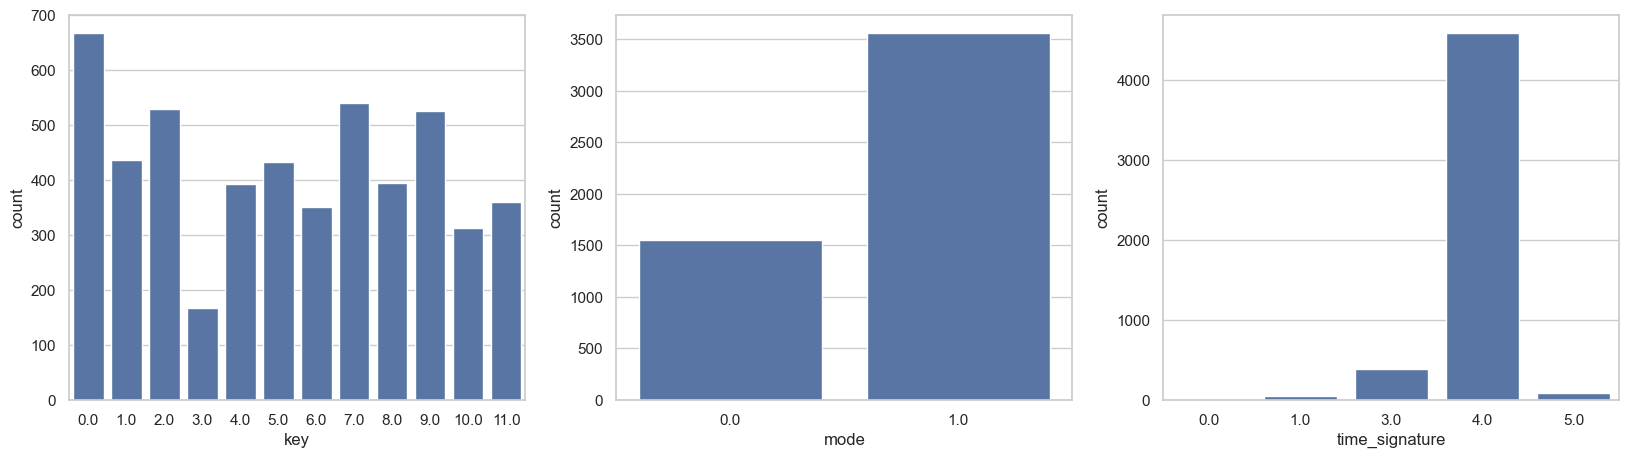

In [298]:
# plot the distribution of key, mode, time_signature on separate subplots for each year
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(ax=axes[0], x='key', data=track_per_year)
sns.countplot(ax=axes[1], x='mode', data=track_per_year)
sns.countplot(ax=axes[2], x='time_signature', data=track_per_year)
plt.show()

I was thinking to drop these three columns since they have pretty low variance but I'll just keep it for now.

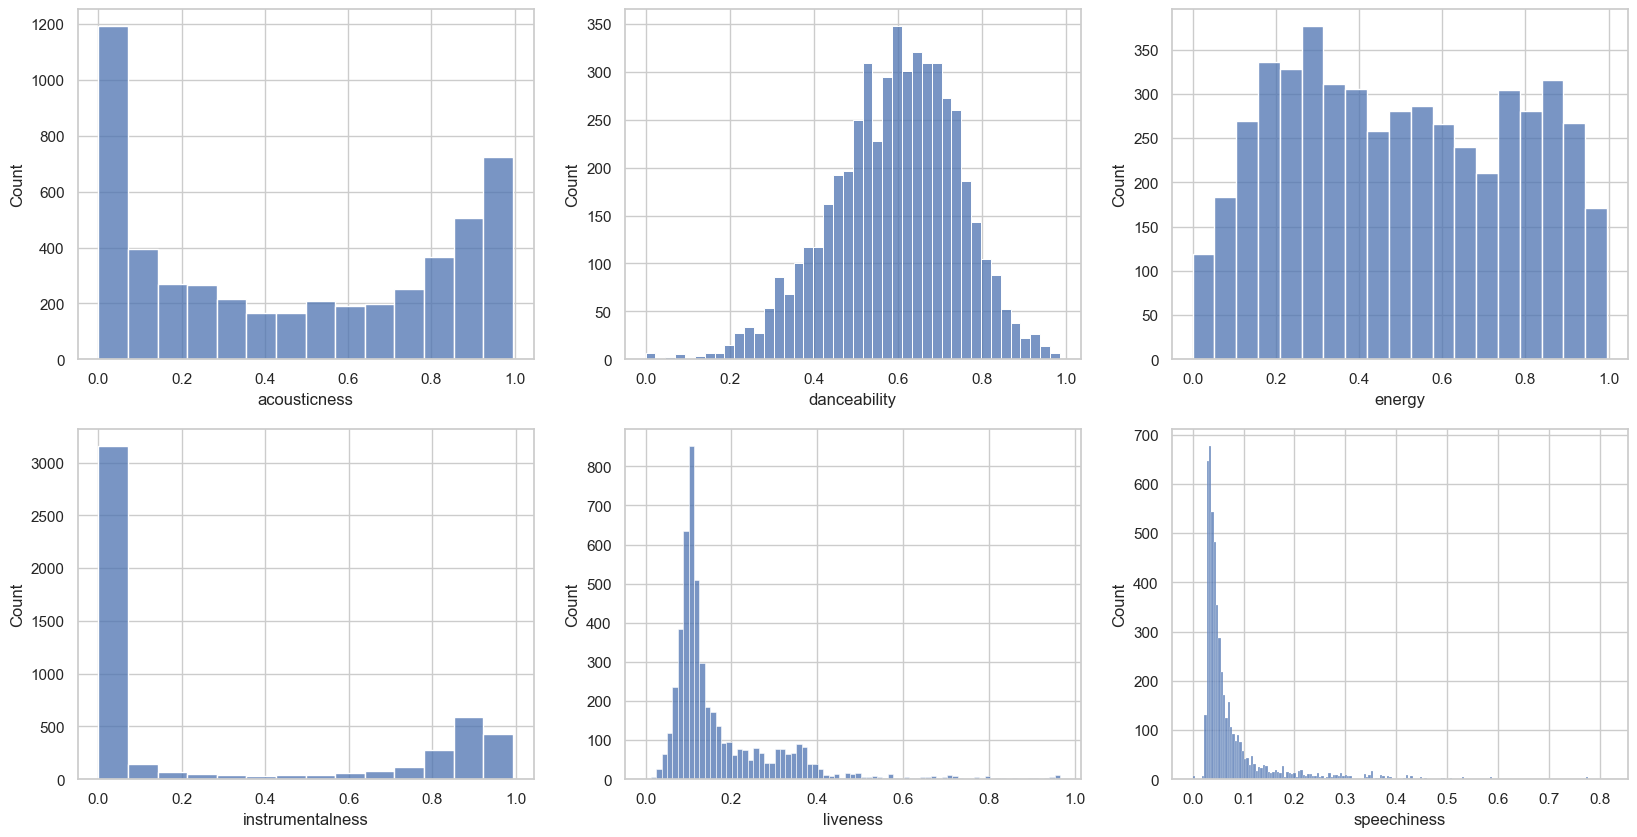

In [299]:
# visualize the distribution of audio features on separate subplots as well
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.histplot(ax=axes[0, 0], x='acousticness', data=track_per_year)
sns.histplot(ax=axes[0, 1], x='danceability', data=track_per_year)
sns.histplot(ax=axes[0, 2], x='energy', data=track_per_year)
sns.histplot(ax=axes[1, 0], x='instrumentalness', data=track_per_year)
sns.histplot(ax=axes[1, 1], x='liveness', data=track_per_year)
sns.histplot(ax=axes[1, 2], x='speechiness', data=track_per_year)
plt.show()

#### Let visualize how much my music taste changes over the year

In [300]:
track_per_year.columns

Index(['year', 'track_id', 'track_name', 'artist_name',
       'total_listened_duration_ms', 'total_plays', 'track_duration_ms',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

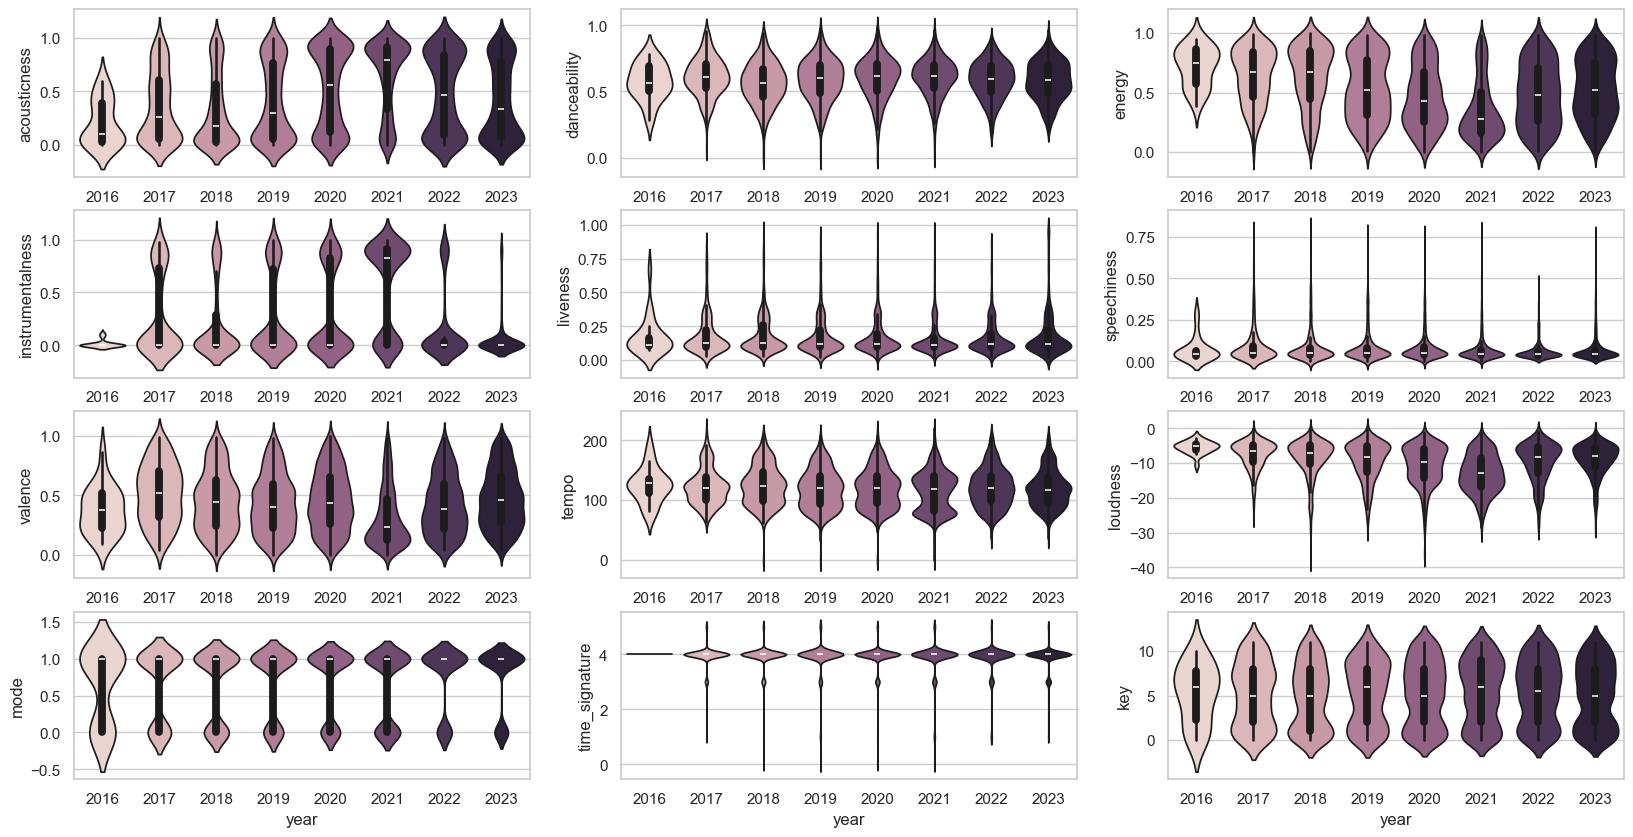

In [306]:
# let's use violin plot to see the distribution of audio features per year
fig, axes = plt.subplots(4, 3, figsize=(20, 10))
sns.violinplot(ax=axes[0, 0], x='year', y='acousticness', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[0, 1], x='year', y='danceability', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[0, 2], x='year', y='energy', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[1, 0], x='year', y='instrumentalness', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[1, 1], x='year', y='liveness', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[1, 2], x='year', y='speechiness', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[2, 0], x='year', y='valence', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[2, 1], x='year', y='tempo', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[2, 2], x='year', y='loudness', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[3, 0], x='year', y='mode', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[3, 1], x='year', y='time_signature', data=track_per_year, hue='year', legend = False)
sns.violinplot(ax=axes[3, 2], x='year', y='key', data=track_per_year, hue='year', legend = False)
plt.show()


<Axes: xlabel='year', ylabel='key'>

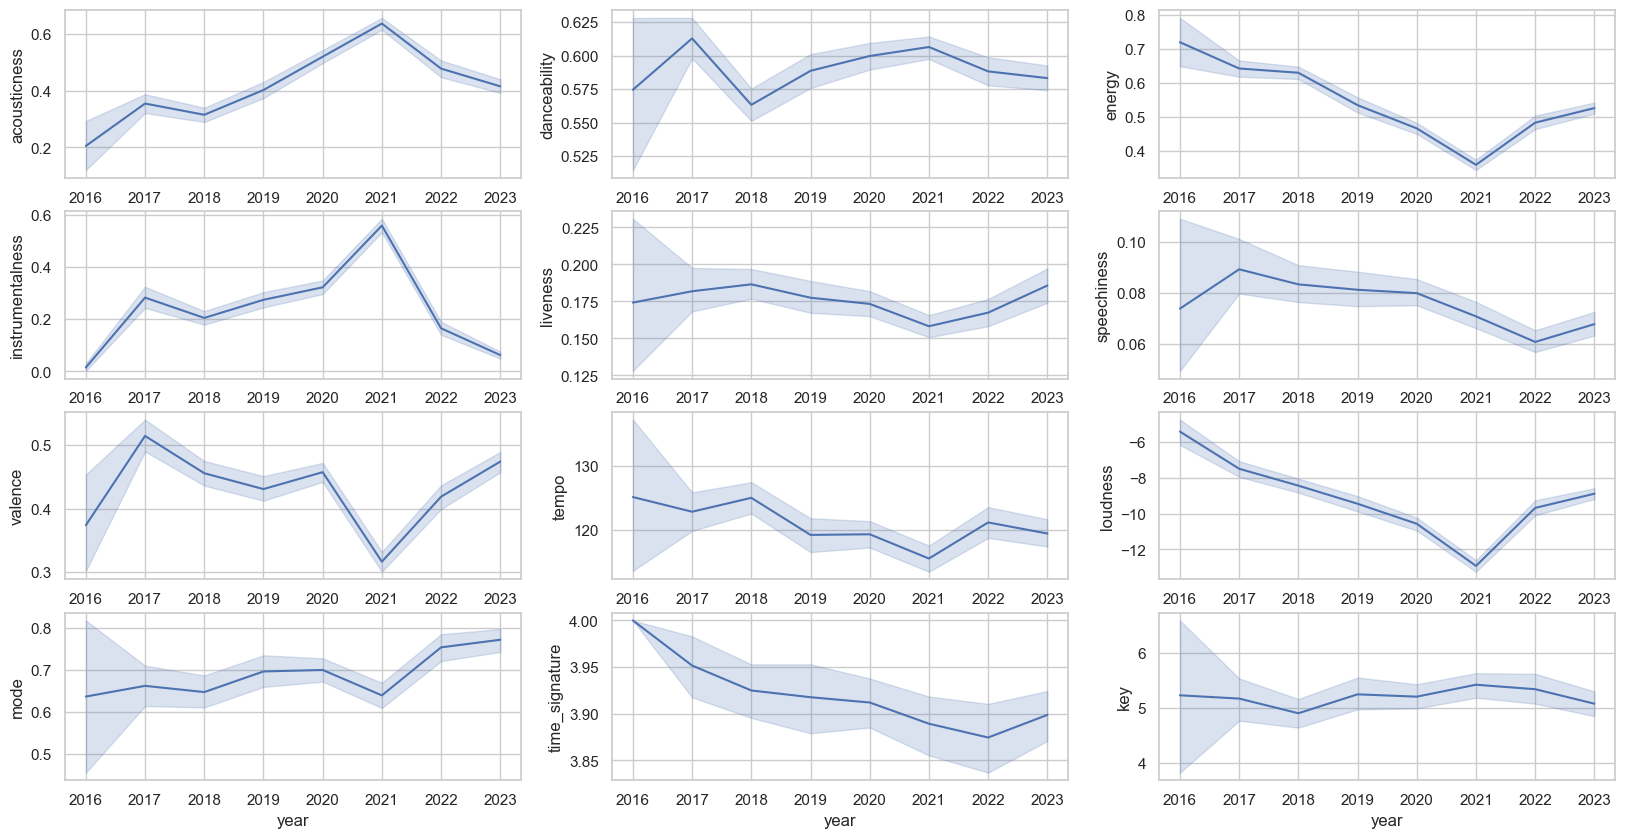

In [305]:
# well, its a bit hard to understand the distribution of audio features per year using violin plot, so let's use line plot instead
fig, axes = plt.subplots(4, 3, figsize=(20, 10))
sns.lineplot(ax=axes[0, 0], x='year', y='acousticness', data=track_per_year)
sns.lineplot(ax=axes[0, 1], x='year', y='danceability', data=track_per_year)
sns.lineplot(ax=axes[0, 2], x='year', y='energy', data=track_per_year)
sns.lineplot(ax=axes[1, 0], x='year', y='instrumentalness', data=track_per_year)
sns.lineplot(ax=axes[1, 1], x='year', y='liveness', data=track_per_year)
sns.lineplot(ax=axes[1, 2], x='year', y='speechiness', data=track_per_year)
sns.lineplot(ax=axes[2, 0], x='year', y='valence', data=track_per_year)
sns.lineplot(ax=axes[2, 1], x='year', y='tempo', data=track_per_year)
sns.lineplot(ax=axes[2, 2], x='year', y='loudness', data=track_per_year)
sns.lineplot(ax=axes[3, 0], x='year', y='mode', data=track_per_year)
sns.lineplot(ax=axes[3, 1], x='year', y='time_signature', data=track_per_year)
sns.lineplot(ax=axes[3, 2], x='year', y='key', data=track_per_year)

In [307]:
# now let's limit the tracks to only top 100 tracks per year
top100_tracks = track_per_year.groupby('year').head(100).reset_index(drop=True)

is there any difference if we measure the 'Music Taste' information from every tracks on each year or only from the top 100?

<Axes: xlabel='year', ylabel='key'>

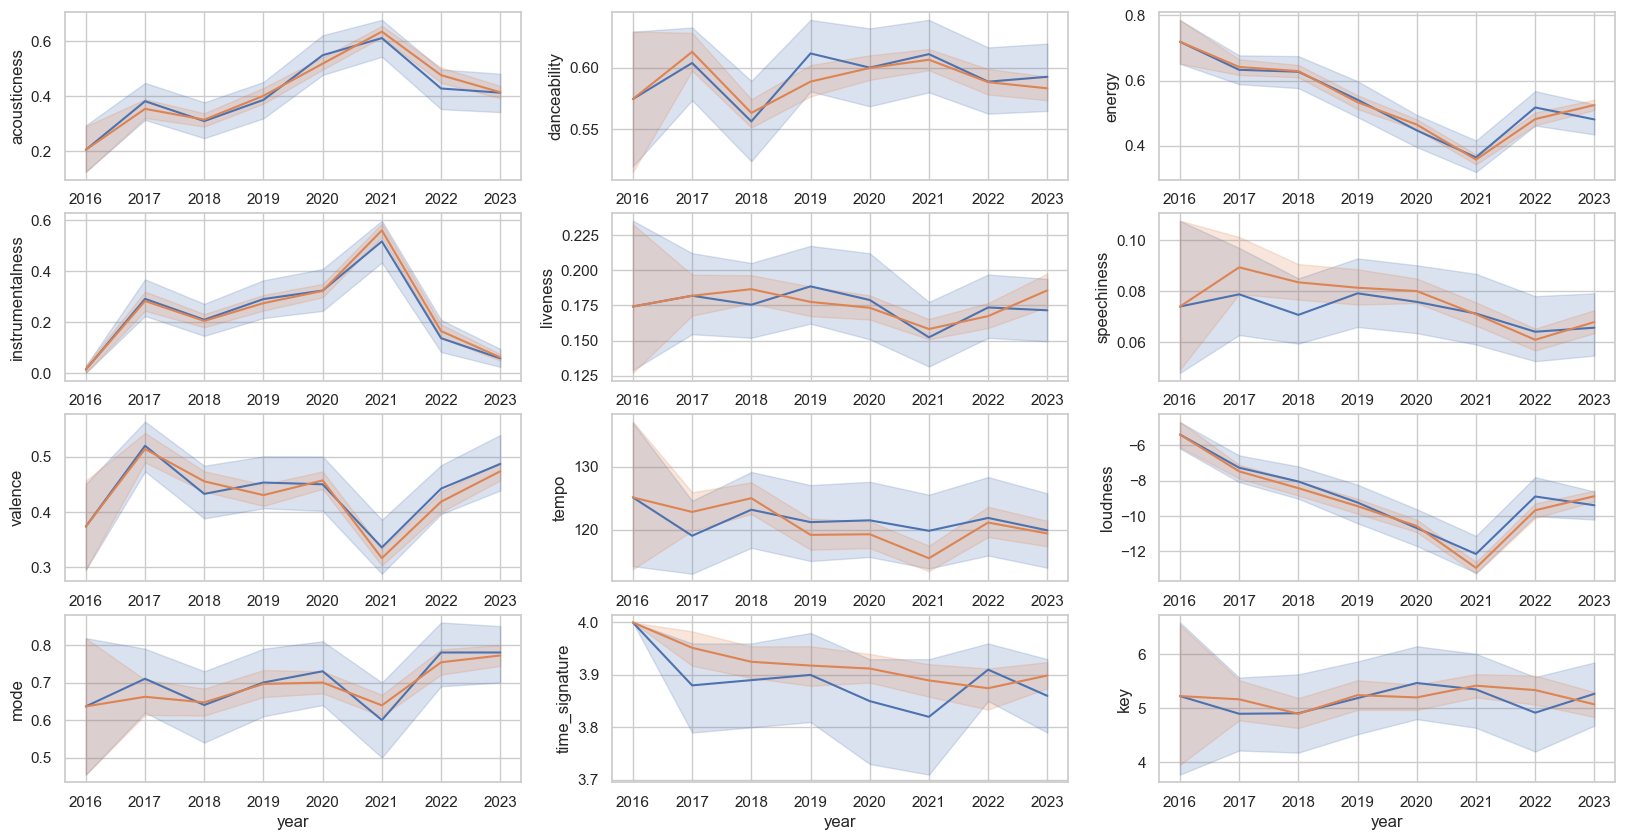

In [312]:
# visualize the lineplot for the top100_tracks and tracks_per_year side by side
fig, axes = plt.subplots(4, 3, figsize=(20, 10))

#for the top100_tracks
sns.lineplot(ax=axes[0, 0], x='year', y='acousticness', data=top100_tracks)
sns.lineplot(ax=axes[0, 1], x='year', y='danceability', data=top100_tracks)
sns.lineplot(ax=axes[0, 2], x='year', y='energy', data=top100_tracks)
sns.lineplot(ax=axes[1, 0], x='year', y='instrumentalness', data=top100_tracks)
sns.lineplot(ax=axes[1, 1], x='year', y='liveness', data=top100_tracks)
sns.lineplot(ax=axes[1, 2], x='year', y='speechiness', data=top100_tracks)
sns.lineplot(ax=axes[2, 0], x='year', y='valence', data=top100_tracks)
sns.lineplot(ax=axes[2, 1], x='year', y='tempo', data=top100_tracks)
sns.lineplot(ax=axes[2, 2], x='year', y='loudness', data=top100_tracks)
sns.lineplot(ax=axes[3, 0], x='year', y='mode', data=top100_tracks)
sns.lineplot(ax=axes[3, 1], x='year', y='time_signature', data=top100_tracks)
sns.lineplot(ax=axes[3, 2], x='year', y='key', data=top100_tracks)

sns.lineplot(ax=axes[0, 0], x='year', y='acousticness', data=track_per_year)
sns.lineplot(ax=axes[0, 1], x='year', y='danceability', data=track_per_year)
sns.lineplot(ax=axes[0, 2], x='year', y='energy', data=track_per_year)
sns.lineplot(ax=axes[1, 0], x='year', y='instrumentalness', data=track_per_year)
sns.lineplot(ax=axes[1, 1], x='year', y='liveness', data=track_per_year)
sns.lineplot(ax=axes[1, 2], x='year', y='speechiness', data=track_per_year)
sns.lineplot(ax=axes[2, 0], x='year', y='valence', data=track_per_year)
sns.lineplot(ax=axes[2, 1], x='year', y='tempo', data=track_per_year)
sns.lineplot(ax=axes[2, 2], x='year', y='loudness', data=track_per_year)
sns.lineplot(ax=axes[3, 0], x='year', y='mode', data=track_per_year)
sns.lineplot(ax=axes[3, 1], x='year', y='time_signature', data=track_per_year)
sns.lineplot(ax=axes[3, 2], x='year', y='key', data=track_per_year)


apart from being less noisy, it seems that there is not so much different between top100 and whole data, meaning the value of tracks' audio features within or outside top100 range are relatively the same

### my "Music Taste" compiled

In [313]:
track_per_year.columns

Index(['year', 'track_id', 'track_name', 'artist_name',
       'total_listened_duration_ms', 'total_plays', 'track_duration_ms',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [315]:
# scratch the year, let's put them all together
tracks_alltogether = track_per_year.groupby('track_id').agg({'track_name': 'first', 'artist_name': 'first', 'total_plays': 'sum', 'total_listened_duration_ms':'sum', 'track_duration_ms':'first', 'danceability':'first', 'energy':'first', 'key':'first', 'loudness':'first', 'mode':'first', 'speechiness':'first', 'acousticness':'first', 'instrumentalness':'first', 'liveness':'first', 'valence':'first', 'tempo':'first', 'time_signature':'first'}).reset_index()

In [316]:
tracks_alltogether.describe()

total_plays  total_listened_duration_ms  track_duration_ms  \
count  3377.000000                3.377000e+03        3377.000000   
mean     25.169973                5.025274e+06      193110.173231   
std      58.570563                1.177467e+07       65388.623951   
min       1.000000                5.000000e+03           0.000000   
25%       1.000000                2.030310e+05      150857.000000   
50%       2.000000                4.015200e+05      191146.000000   
75%      14.000000                2.615040e+06      230426.000000   
max     639.000000                1.126300e+08      578648.000000   

       danceability       energy          key     loudness         mode  \
count   3377.000000  3377.000000  3377.000000  3377.000000  3377.000000   
mean       0.594660     0.481254     5.169085   -10.393446     0.691738   
std        0.148434     0.274564     3.548515     5.566507     0.461844   
min        0.000000     0.000138     0.000000   -38.169000     0.000000   
25%        0.502000     0.244000     2.000000   -14.151000     0.000000   
50%        0.607000     0.454000     5.000000    -9.272000     1.000000   
75%        0.700000     0.727000     8.000000    -5.869000     1.000000   
max        0.985000     0.996000    11.000000    -0.234000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  3377.000000   3377.000000       3377.000000  3377.000000  3377.000000   
mean      0.074429      0.490699          0.332495     0.173206     0.420458   
std       0.078153      0.365831          0.407361     0.139312     0.255916   
min       0.000000      0.000000          0.000000     0.000000     0.000000   
25%       0.035600      0.100000          0.000003     0.096600     0.198000   
50%       0.046900      0.516000          0.007110     0.116000     0.386000   
75%       0.076800      0.864000          0.843000     0.197000     0.618000   
max       0.814000      0.996000          0.993000     0.965000     0.999000   

             tempo  time_signature  
count  3377.000000     3377.000000  
mean    119.892885        3.891620  
std      31.851008        0.458055  
min       0.000000        0.000000  
25%      94.950000        4.000000  
50%     119.975000        4.000000  
75%     140.089000        4.000000  
max     219.982000        5.000000

In [339]:
from plotnine import *

In [345]:
# visualize tracks_alltogether's audio feature using bar plot in the same visualization
variables = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
mean_values = tracks_alltogether[variables].mean()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'feature': mean_values.index,
    'value': mean_values.values
})

# Create a spider chart using ggplot
ggplot(plot_data, aes(x='feature', y='value')) + \
    geom_polygon(fill='blue', alpha=0.3) + \
    geom_point(color='blue', size=3) + \
    theme_minimal() + \
    ggtitle('Average Audio Features in Tracks_AllTogether') + \
    ylim(0, 1) + \
    coord_polar(start = 0)



NameError: name 'coord_polar' is not defined

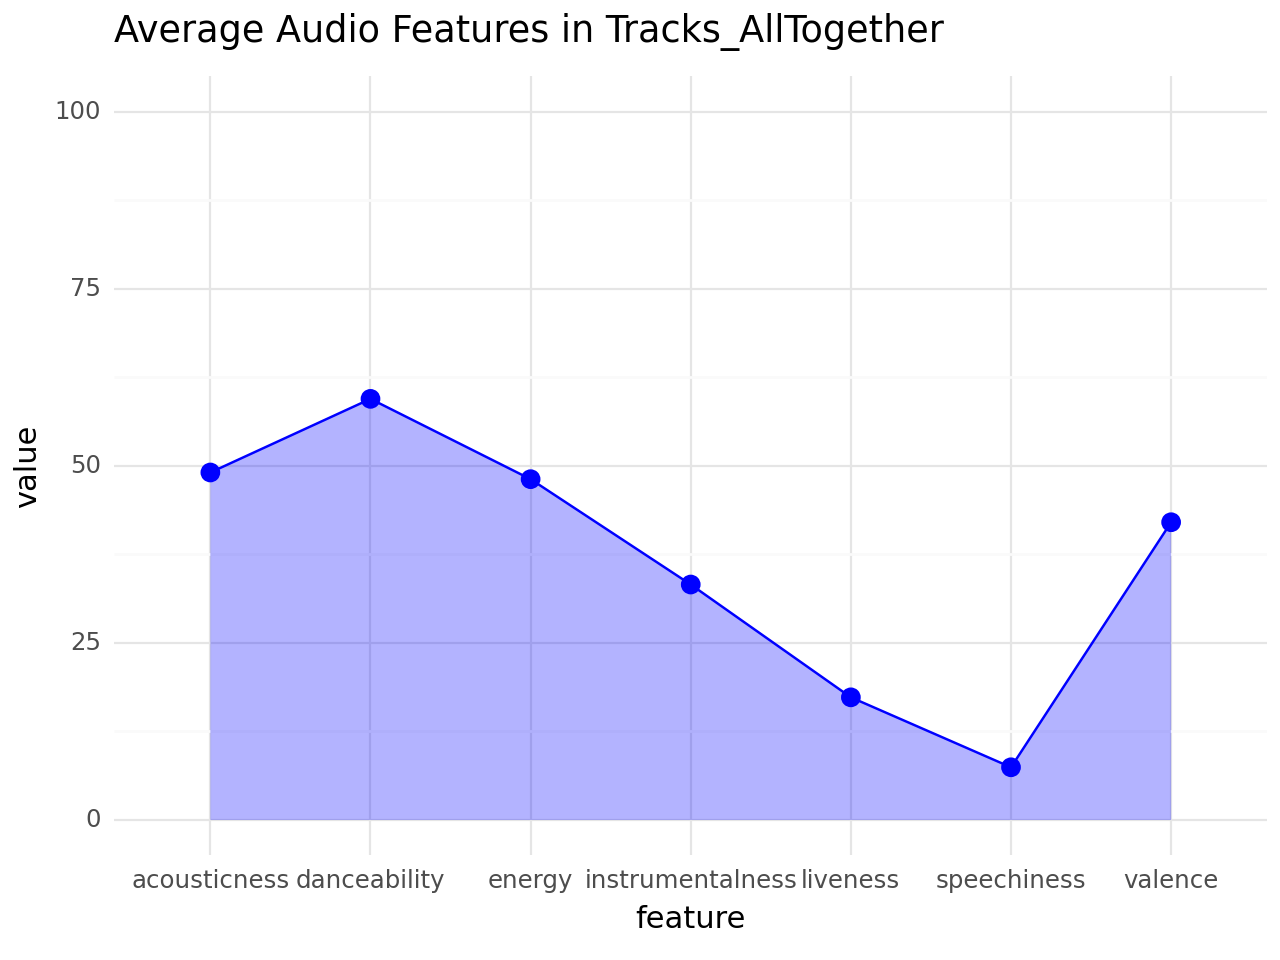

<Figure Size: (640 x 480)>

In [347]:
# Assuming mean_values is a DataFrame with the audio features
variables = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
mean_values = mean_values[variables]

plot_data = pd.DataFrame({
    'feature': mean_values.index,
    'value': mean_values.values
})

# Rescale values to a 0-100 range for better comparison
plot_data['value'] = plot_data['value'] * 100

# Create a radar chart using ggplot
ggplot(plot_data, aes(x='feature', y='value', group=1)) + \
    geom_line(color='blue') + \
    geom_ribbon(aes(ymin=0, ymax='value'), fill='blue', alpha=0.3) + \
    geom_point(color='blue', size=3) + \
    theme_minimal() + \
    ggtitle('Average Audio Features in Tracks_AllTogether') + \
    ylim(0, 100)


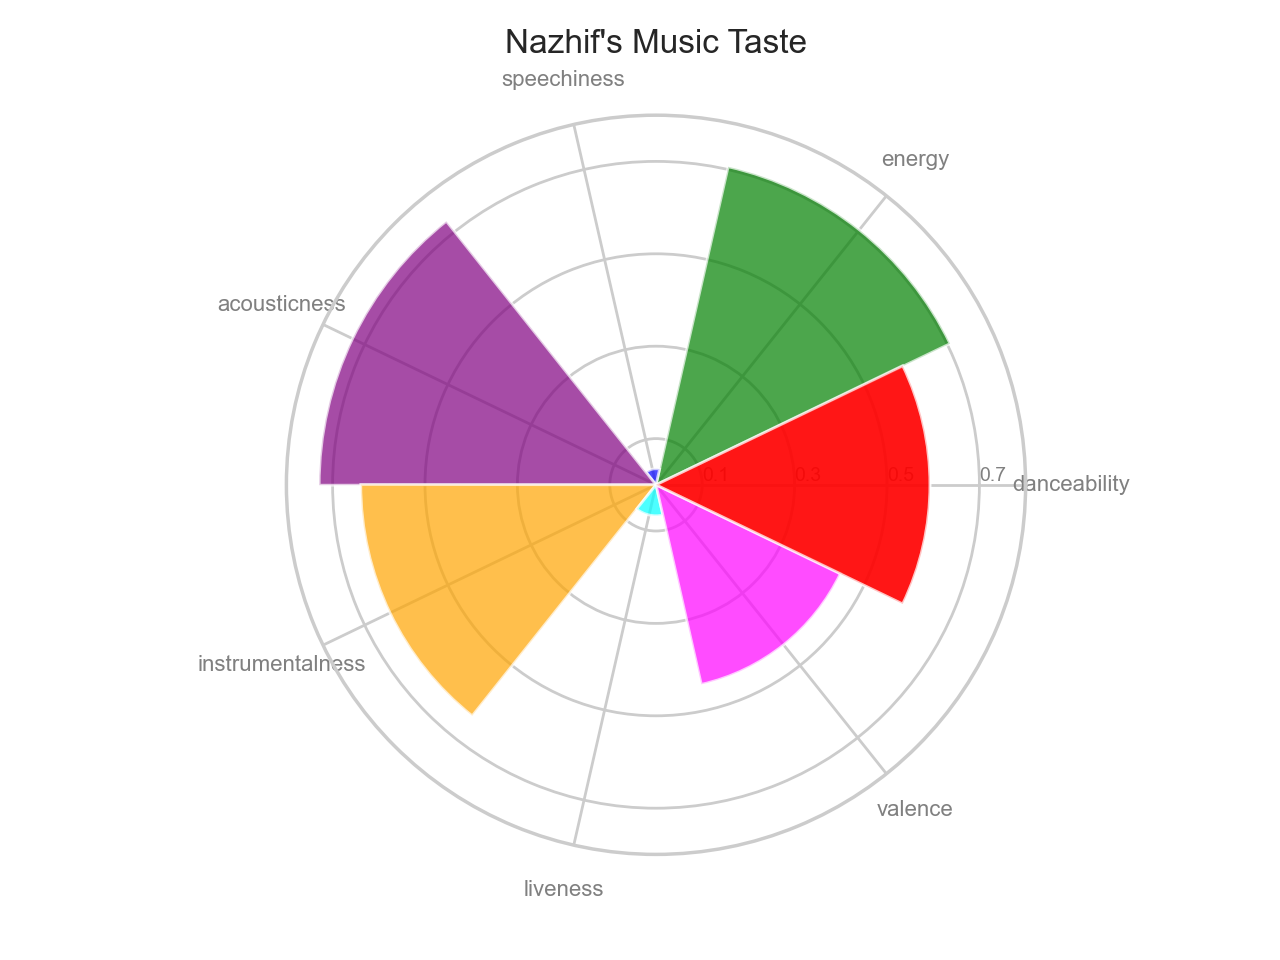

In [378]:
# visualizing the audio-features ranged from 0 to 1 using radar chart
variables = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
categories = list(variables)
N = len(variables)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = tracks_alltogether.loc[0, variables].values.flatten().tolist()
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1], ["0.1", "0.3", "0.5", "0.7", "0.9", "1"], color="grey", size=7)
plt.ylim(0, 0.8)

# ax.fill_between(angles, 0, values, alpha=0.3, color='blue')
ax.bar(angles, values, width=0.9, alpha=0.7, color=['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta'])

# Set the title
ax.set_title("Nazhif's Music Taste")

# Show the plot
plt.show()


## analyzing listening sessions

In [286]:
# we need to get the song duration from track_info_df
stream_df = stream_df.merge(track_info_df[['track_id', 'duration_ms']], on='track_id', how='left')

In [288]:
stream_df.isna().sum()

ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
track_id             0
reason_start         0
reason_end       20538
shuffle              0
skipped         105421
offline              0
duration_ms          0
dtype: int64

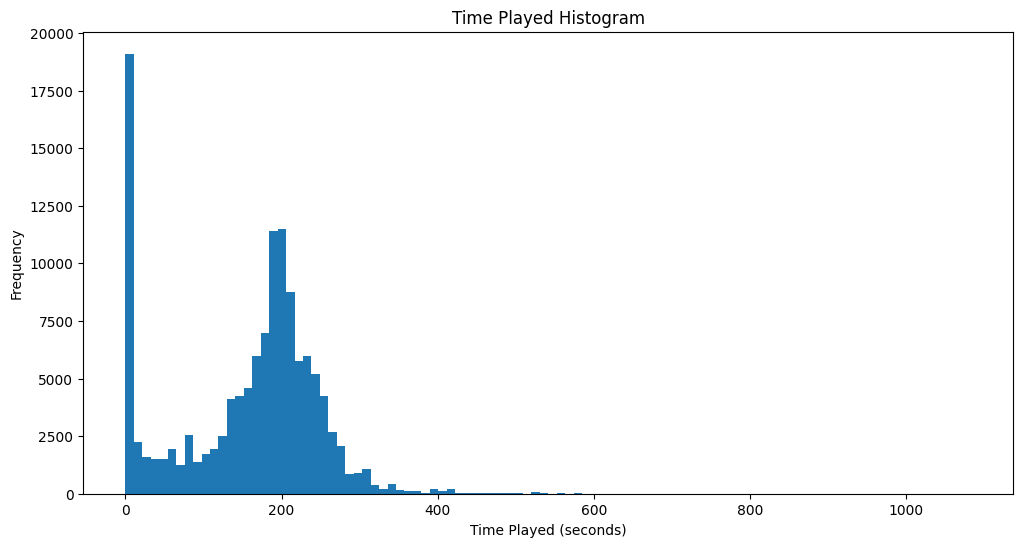

In [289]:
# plot histogram of ms_played in seconds
plt.figure(figsize=(12, 6))
plt.hist(stream_df['ms_played'].div(1000), bins=100, color='tab:blue')
plt.xlabel('Time Played (seconds)')
plt.ylabel('Frequency')
plt.title('Time Played Histogram')
plt.show()

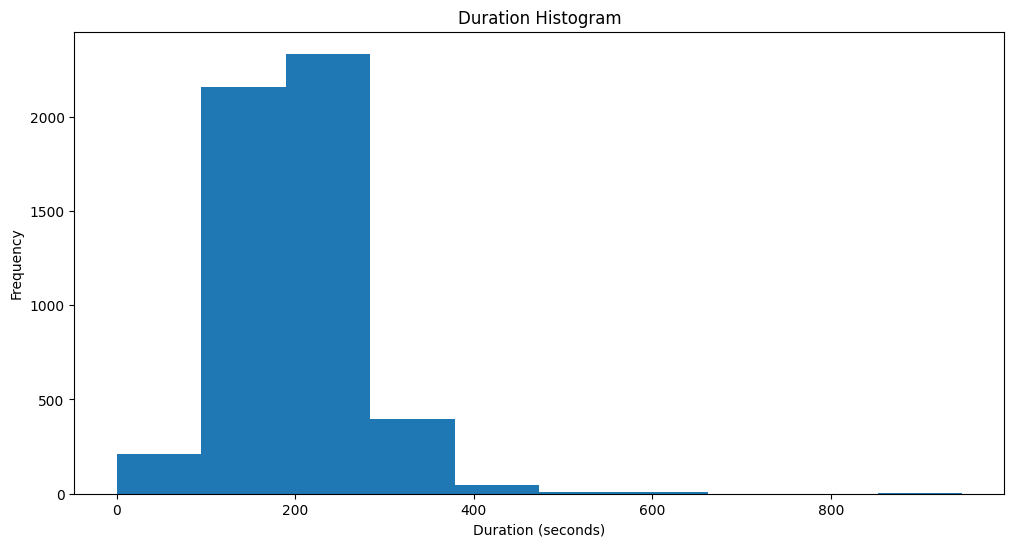

In [298]:
# plot histogram of duration_ms in seconds with only unique track_id and filter-out the songs that are longer than 1000 seconds
plt.figure(figsize=(12, 6))
plt.hist(stream_df[(stream_df['track_id'].duplicated() == False) & (stream_df['duration_ms'] < 1000000)]['duration_ms'].div(1000), bins=10, color='tab:blue')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Duration Histogram')
plt.show()

In [324]:
# number of rows / listening session that are less than its duration, and the percentage of it
print('number of rows/session shorter than its duration: ' + str(stream_df[stream_df['ms_played'] < stream_df['duration_ms']].shape[0]))
print(str((stream_df[stream_df['ms_played'] < stream_df['duration_ms']].shape[0] / stream_df.shape[0] * 100).__round__(2)) + '%')

number of rows/session shorter than its duration: 44209
34.55%


In [335]:
stream_df[(stream_df['track_id'].duplicated() == False) & (stream_df['duration_ms'] < 1000000) & (stream_df['ms_played'] < stream_df['duration_ms'])]['ms_played'].div(1000).value_counts(bins=10, sort=False)

(-0.58, 57.86]        1756
(57.86, 115.719]       254
(115.719, 173.579]     410
(173.579, 231.438]     239
(231.438, 289.298]      82
(289.298, 347.158]      28
(347.158, 405.017]       5
(405.017, 462.877]       0
(462.877, 520.736]       0
(520.736, 578.596]       1
Name: count, dtype: int64

as we can see from the distribution of ms_played and duration_ms (both are displayed in seconds), 34% of the rows(listening/streaming sessions) are 0s or less than the track's duration, which is pretty interesting to explore.

In [319]:
stream_df.columns

Index(['ts', 'platform', 'ms_played', 'track_name', 'artist_name',
       'album_name', 'track_id', 'reason_start', 'reason_end', 'shuffle',
       'skipped', 'offline', 'duration_ms'],
      dtype='object')

In [330]:
stream_df[['reason_start', 'reason_end', 'shuffle', 'skipped']].isna().sum()

reason_start         0
reason_end       20538
shuffle              0
skipped         105421
dtype: int64

In [329]:
# display unique value of reason_start, reason_end, shuffle and skipped columns
print(stream_df['reason_start'].unique())
print(stream_df['reason_end'].unique())
print(stream_df['shuffle'].unique())
print(stream_df['skipped'].unique())

['clickrow' 'fwdbtn' 'appload' 'trackdone' 'backbtn' 'playbtn' 'remote'
 'trackerror']
['fwdbtn' 'endplay' 'unexpected-exit-while-paused' 'logout' 'trackdone'
 nan 'backbtn' 'remote' 'unexpected-exit' 'trackerror' 'unknown']
[False  True]
[nan '0.0' '1.0' 'False' 'True']


In [353]:
# conditions 
incomplete = (stream_df['ms_played'] < stream_df['duration_ms'])
complete = (stream_df['ms_played'] == stream_df['duration_ms'])
less_than_minute = (stream_df['ms_played'] <= 60000)
longer_than_duration = (stream_df['ms_played'] > stream_df['duration_ms'])

In [354]:
display(stream_df[less_than_minute]['reason_start'].value_counts(dropna=False))
display(stream_df[~less_than_minute & incomplete]['reason_start'].value_counts(dropna=False))
display(stream_df[complete]['reason_start'].value_counts(dropna=False))
display(stream_df[longer_than_duration]['reason_start'].value_counts(dropna=False))

reason_start
fwdbtn        9951
trackdone     6764
backbtn       5416
clickrow      2274
appload       1938
remote         315
playbtn        204
trackerror     153
Name: count, dtype: int64

reason_start
trackdone     14691
appload        1819
fwdbtn          909
clickrow        783
backbtn         327
remote          292
playbtn         110
trackerror       31
Name: count, dtype: int64

reason_start
trackdone     74302
clickrow       2652
fwdbtn         2634
backbtn        1502
playbtn         309
trackerror      161
appload         133
remote           37
Name: count, dtype: int64

reason_start
trackdone     1281
appload        255
clickrow       200
fwdbtn         126
backbtn         98
remote          45
playbtn         12
trackerror       5
Name: count, dtype: int64

In [358]:
display(stream_df[less_than_minute]['reason_end'].value_counts(dropna=False))
display(stream_df[~less_than_minute & incomplete]['reason_end'].value_counts(dropna=False))
display(stream_df[complete]['reason_end'].value_counts(dropna=False))
display(stream_df[longer_than_duration]['reason_end'].value_counts(dropna=False))

reason_end
fwdbtn                          9579
NaN                             5382
backbtn                         4851
endplay                         2771
trackdone                       1995
logout                          1701
remote                           414
unexpected-exit-while-paused     198
trackerror                        63
unexpected-exit                   39
unknown                           22
Name: count, dtype: int64

reason_end
trackdone                       10415
logout                           3047
NaN                              1790
fwdbtn                           1408
endplay                           903
remote                            647
backbtn                           382
unexpected-exit-while-paused      311
unknown                            32
unexpected-exit                    27
Name: count, dtype: int64

reason_end
trackdone    68073
NaN          13632
endplay         24
fwdbtn           1
Name: count, dtype: int64

reason_end
trackdone                       1509
NaN                              404
logout                            39
fwdbtn                            37
endplay                           16
backbtn                            7
remote                             6
unexpected-exit-while-paused       4
Name: count, dtype: int64

In [359]:
display(stream_df[less_than_minute]['shuffle'].value_counts(dropna=False))
display(stream_df[~less_than_minute & incomplete]['shuffle'].value_counts(dropna=False))
display(stream_df[complete]['shuffle'].value_counts(dropna=False))
display(stream_df[longer_than_duration]['shuffle'].value_counts(dropna=False))

shuffle
True     15522
False    11493
Name: count, dtype: int64

shuffle
True     11383
False     7579
Name: count, dtype: int64

shuffle
True     49515
False    32215
Name: count, dtype: int64

shuffle
True     1031
False     991
Name: count, dtype: int64

In [360]:
display(stream_df[less_than_minute]['skipped'].value_counts(dropna=False))
display(stream_df[~less_than_minute & incomplete]['skipped'].value_counts(dropna=False))
display(stream_df[complete]['skipped'].value_counts(dropna=False))
display(stream_df[longer_than_duration]['skipped'].value_counts(dropna=False))

skipped
NaN      23978
True      1630
1.0        712
False      482
0.0        213
Name: count, dtype: int64

skipped
NaN      17549
False      658
True       316
0.0        306
1.0        133
Name: count, dtype: int64

skipped
NaN      63814
False    14875
0.0       3029
True         8
1.0          4
Name: count, dtype: int64

skipped
NaN      1643
False     267
0.0        98
True       12
1.0         2
Name: count, dtype: int64